In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline

GITT_folder = '/home/emirg/Dropbox/research/2023.02 Jamie ODE/Truly_Truly_Truly_Final_Simulated/GITT computation/' 
ISDM_folder = '/home/emirg/Dropbox/research/2023.02 Jamie ODE/Truly_Truly_Truly_Final_Simulated/Inference_Constant/'

D_unit = 1e-15
D_true = lambda x: np.exp(
    +1555517648.355233 * pow(x,17) -13425260054.107533 * pow(x,16) +52936283659.15297 * pow(x,15) 
    -126243650142.94052 * pow(x,14) +203179823141.90155 * pow(x,13) -233165476684.97226 * pow(x,12) 
    +196543615260.50867 * pow(x,11) -123537175593.2803 * pow(x,10) +58188260273.877464 * pow(x,9) 
    -20474241136.38758 * pow(x,8) +5324570330.260105 * pow(x,7) -1004595052.0503489 * pow(x,6) 
    +133716806.33828469 * pow(x,5) -12060683.963692905 * pow(x,4) +695276.6986259943 * pow(x,3) 
    -23440.850109680614 * pow(x,2) +398.092256851681 * pow(x,1) -29.03923635183008 * pow(x,0)
)*1e-4/D_unit


In [141]:
df_D_GITT = pd.read_csv(GITT_folder + "D_GITT_simulation_tttf.csv")
df_D_ISDM = pd.read_csv(ISDM_folder + "D_estimates_Simulated_050_Constant_pOCV_gradient_descent_tttf.csv", index_col=0)

In [142]:
c_GITT = df_D_GITT.c_cmax.to_numpy()
D_GITT = df_D_GITT.D_SI.to_numpy()/D_unit
c_ISDM = df_D_ISDM.c[1:].to_numpy()
D_ISDM = df_D_ISDM[df_D_ISDM.loc["R^2"].idxmax()][1:].to_numpy()

In [143]:
D_GITT_int = InterpolatedUnivariateSpline(c_GITT[::-1], D_GITT[::-1], k=1, ext=2)
D_ISDM_int = InterpolatedUnivariateSpline(c_ISDM[::-1], D_ISDM[::-1], k=1, ext=2)

In [144]:
c_min = max(min(c_ISDM), min(c_GITT))
c_max = min(max(c_ISDM),max(c_GITT))
N_range = 1000
c_range = np.linspace(c_min, c_max, N_range)

D_GITT_range = D_GITT_int(c_range)
D_ISDM_range = D_ISDM_int(c_range)
D_TRUE_range = D_true(c_range)

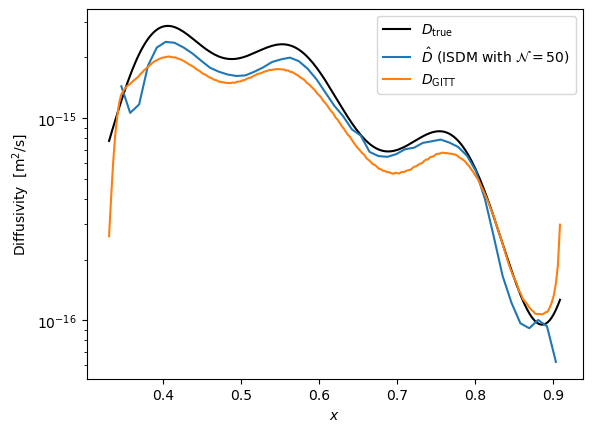

In [149]:
plt.plot(c_GITT, D_true(c_GITT)*D_unit,'k',  label = r"$D_{\rm true}$")
plt.plot(c_ISDM, D_ISDM*D_unit, label=r"$\hat{D}$ (ISDM with $\mathcal{N}=50$)")
plt.plot(c_GITT, D_GITT*D_unit , label = r"$D_{\rm GITT}$")
plt.yscale("log")
plt.legend()
plt.xlabel(r"$x$")
plt.ylabel(r"Diffusivity $\mathrm{~[m^2/s]}$")
plt.savefig("DFN_comparison_tttf.pdf")
plt.show()

In [146]:
1-np.mean((D_ISDM_range - D_TRUE_range)**2)/np.var(D_TRUE_range)

0.8827954388156861

In [147]:
1-np.mean((D_GITT_range - D_TRUE_range)**2)/np.var(D_TRUE_range)

0.7772656807930255